# "Продвинутый Python". Магистерская программа ВШЭ.

In [10]:
import time

import numpy as np
import matplotlib.pyplot as plt

### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

Зачем нужна doc string? Как её посмотерть?

In [11]:
# Bad way

def delete_zeros_from_array(array):
    #     logic for deleting zeroes
    pass

In [12]:
# Not bad way

from functools import partial

def delete_elements_from_array(array, element):
    
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    
    #solution:
    #moving all elements to the end of the array
    #slice removing is less complex than element-wise removing: O(1) vs O(n)
    
    #looking for the first appearance of the element
    elements_exist = False
    for i in range(len(array)):
        if array[i] == element:
            elements_exist = True
            sequence_start = i
            break
    #if elements in array    
    if elements_exist:
        els_in_row = 0
        for i in range(sequence_start + 1, len(array)):

            if array[i] == element:
                els_in_row += 1
            else:
                array[sequence_start], array[i] = array[i], array[sequence_start]
                sequence_start += 1 
        #slice removing
        del array[sequence_start:]
        return array
    #no elements in array
    else:
        return array
    
delete_zeros_from_array = partial(delete_elements_from_array, element=0)

In [13]:
np.random.seed(42)
avg_time = []
list_lenght = [x for x in range(100, 1000, 10)]
for lenght in list_lenght:
    tmp_list = []
    for sampling in range(50):
        array = [np.random.randint(0, 6) for n in range(lenght)]
        start_time = time.time()
        c = delete_elements_from_array(array, element=0)
        tmp_list.append(time.time() - start_time)
    avg_time.append(sum(tmp_list) / len(tmp_list))

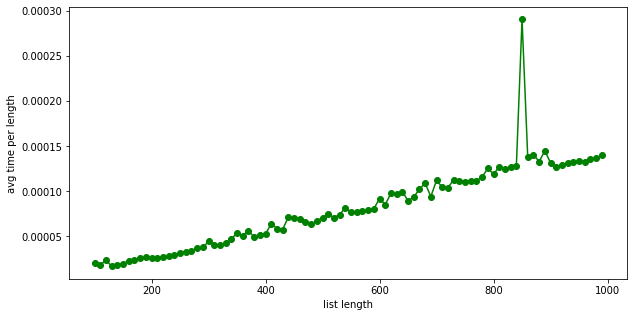

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(list_lenght, avg_time, 'go-')
plt.xlabel('list length')
plt.ylabel('avg time per length')
plt.show()

### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [15]:
def find_min(arr):
    """
    arr: список комплексных чисел
    """

    i_min, mod_min = 0, abs(arr[0])
    
    for i in range(1, len(arr)):
        mod_curr = abs(arr[i])
        if mod_curr < mod_min:
            i_min = i
            mod_min = mod_curr
            
    return arr[i_min]

In [16]:
a = complex(1, 10)
b = complex(1, 10)
c = complex(1, -10)

find_min([a, b, c])

(1+10j)

### Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

In [148]:
from itertools import permutations
from functools import lru_cache

def parser(card_number):
    """
    Function that splits card number into 4 parts
    """
    card_number_string = str(card_number)
    number_length = len(card_number_string) // 4
    return [int(card_number_string[:number_length]),
            int(card_number_string[number_length: 2*number_length]), 
            int(card_number_string[2*number_length: 3*number_length]), 
            int(card_number_string[3*number_length:])]

@lru_cache()
def fibonacci(n): 
    """
    Fibonacci algorithm
    """
    #Recurrsive algorithm doesnt work for large n, so I chose another approach
    a = 0
    b = 1
    if n < 0: 
        print("Incorrect input") 
    elif n == 0: 
        return a 
    elif n == 1: 
        return b 
    else: 
        for i in range(2, n): 
            c = a + b 
            a, b = b, c 
        return b 
    
def euclid_gcd(a, b):
    """
    Euclid algorithm function
    """
    while b != 0:
        a, b = b, a % b
    return a

def quick_median(array):
    """
    Algorithm of quick median
    """
    if len(array) % 2 == 1:
        return quick_select(array, len(array) / 2)
    else:
        return (quick_select(array, len(array) / 2 - 1) + quick_select(array, len(array) / 2)) / 2

def quick_select(array, k):

    if len(array) == 1:
        return array[0]
    
    pivot = array[len(array) // 2]
    
    pivots = [x for x in array if x == pivot]
    highers = [x for x in array if x > pivot]
    lowers = [x for x in array if x < pivot]
    
    if k < len(lowers):
        return quick_select(lowers, k)
    elif k < len(lowers) + len(pivots):
        return pivots[0]
    else:
        return quick_select(highers, k - len(lowers) - len(pivots))
    
def ATM(card_number: int, password: int):
    """
     ATM function.
        
        :param card_number: Input card number
        :type card_number: int
        :param password: Input password
        :type password: int
        
        :returns: Median of the greatest common divisors of all possible combinations of card_number parts and passwrod 
        :rtype: int
    """
    list_of_numbers = parser(card_number)

    fibonacci_numbers = []
    for n in list_of_numbers:
        fibonacci_numbers.append(str(fibonacci(n)))
        
    list_of_combinations = ["".join(comb) for comb in permutations(fibonacci_numbers)]

    list_of_gcd = []
    for n in list_of_combinations:
        list_of_gcd.append(euclid_gcd(int(n), password))
 
    return quick_median(list_of_gcd)

In [149]:
ATM(87654321, 4356)

3.0

### Домашнее задание №3 [0 - 0.1 балла]

**Условие:**
    
Сравнить скорость работы и потребление памяти list и deque.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

In [151]:
import time
import sys
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

In [152]:
n_elements = 2000

l, d = list(), deque()
list_sizes, deque_sizes = [sys.getsizeof(l)], [sys.getsizeof(l)]
list_steps, deque_steps = [0], [0]
list_time, deque_time = [], []

for i in range(n_elements):
    
    
    start_time = time.time()
    l.append(1)
    appending_time = time.time() - start_time
    
    list_sizes.append(sys.getsizeof(l))
    list_steps.append(list_sizes[i+1] - list_sizes[i])
    list_time.append(appending_time)
    
    start_time = time.time()
    d.append(1)
    appending_time = time.time() - start_time
    
    deque_sizes.append(sys.getsizeof(d))
    deque_steps.append(deque_sizes[i+1] - deque_sizes[i])
    deque_time.append(appending_time)

* объем памяти листа меньше, чем у deque при любой длине

* объем памяти листа выделяется нарастающими скачками
* объем памяти deque большими примерно одинаковыми скачками

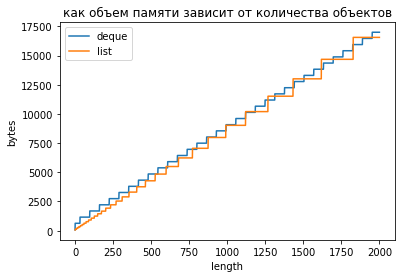

In [153]:
plt.plot(range(len(deque_sizes)), deque_sizes, label='deque')
plt.plot(range(len(list_sizes)), list_sizes, label='list')
plt.legend()
plt.xlabel('length')
plt.ylabel('bytes')
plt.title('как объем памяти зависит от количества объектов')
plt.show()

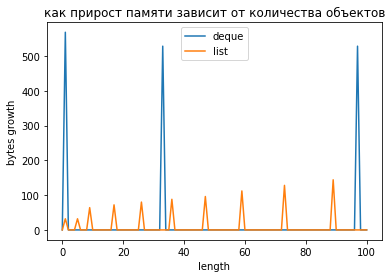

In [17]:
plt.plot(range(len(deque_steps)), deque_steps, label='deque')
plt.plot(range(len(list_steps)), list_steps, label='list')
plt.legend()
plt.xlabel('length')
plt.ylabel('bytes growth')
plt.title('как прирост памяти зависит от количества объектов')
plt.show()

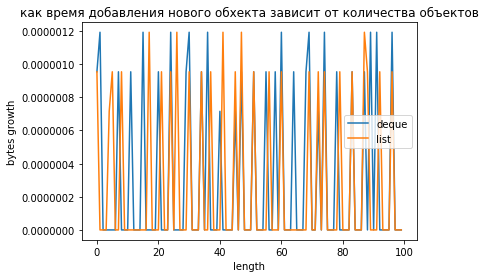

In [23]:
plt.plot(range(len(deque_time)), deque_time, label='deque')
plt.plot(range(len(list_time)), list_time, label='list')
plt.legend()
plt.xlabel('length')
plt.ylabel('bytes growth')
plt.title('как время добавления нового обхекта зависит от количества объектов')
plt.show()

In [30]:
deque_time, list_time = np.array(deque_time), np.array(list_time)

In [33]:
deque_time.mean(), deque_time.std()

(2.956390380859375e-07, 4.697753605556607e-07)

In [34]:
list_time.mean(), list_time.std()

(2.574920654296875e-07, 4.379120435302299e-07)

### Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количество баллов зависит от полноты сравнения.

In [248]:
def my_permutation(arr):
    
    if len(arr) <= 1:
        yield arr
    else:
        for i in range(len(arr)):
          